<a href="https://colab.research.google.com/github/gaggs/SuperStoreEDA/blob/master/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef


In [3]:
from google.colab import files
uploaded=files.upload()

Saving Iris.csv to Iris.csv


In [4]:
import io
data= pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

In [7]:
data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [13]:
data.shape

(150, 5)

In [14]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [22]:
data.drop('Id',axis=1,inplace=True)

KeyError: ignored

In [20]:
cat={"Species":{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}}
data.replace(cat, inplace=True)
data.head(2)

TypeError: ignored

In [21]:
data.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


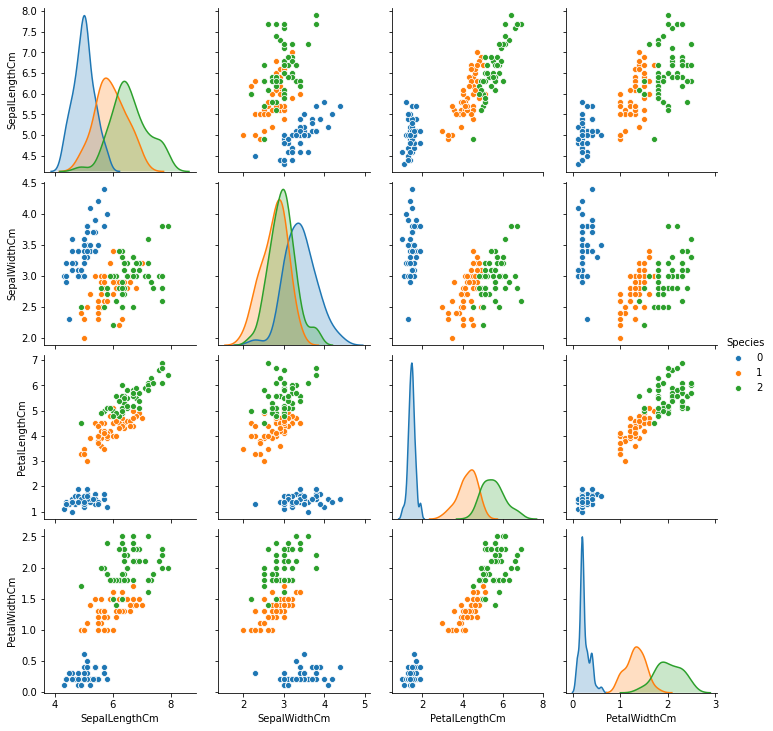

In [24]:
sns.pairplot(data=data,hue="Species")

In [28]:
x=data.corr()

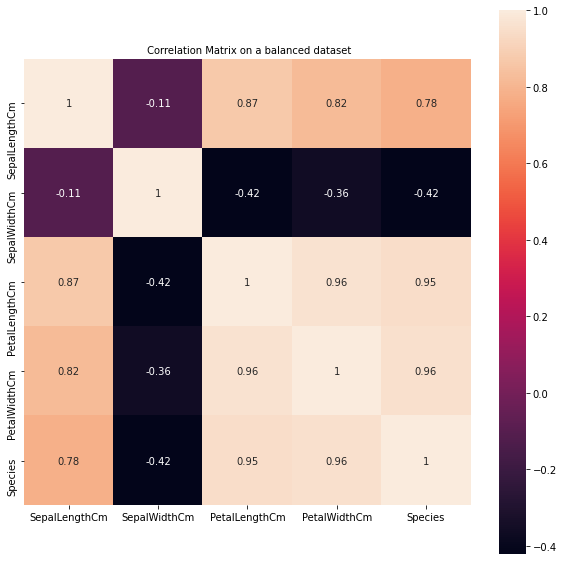

In [30]:
fig=plt.figure(figsize=(10,10))
map=sns.heatmap(x,vmax = 1, square = True,annot=True) 
map.set_title(' Correlation Matrix on a balanced dataset', fontsize=10)
plt.show()

In [31]:
X = (data.drop('Species', axis=1)).values
y = data['Species']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0)

In [33]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": [1,5,10,50,100,500,1000], 
              "min_samples_split": [5,10,100,5000]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
# tree best estimator
tree_clf = grid_tree.best_estimator_
print(tree_clf)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [34]:
model=DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_split=5,random_state=0)
model.fit(X_train, y_train)
Pred=model.predict(X_test)

In [35]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': Pred})  

df

,Actual,Predicted
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0
100,2,2
40,0,0
86,1,1
76,1,1
71,1,1
